In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import csv 
%matplotlib inline

In [12]:
path="data/"
loading = pd.read_csv(path + 'velibLoading.csv', sep=" ")
coord = pd.read_csv(path + 'velibCoord.csv', sep=" ")

In [16]:
loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


In [17]:
coord.head()

,longitude,latitude,bonus,names
1,2.377389,48.886300,0,EURYALE DEHAYNIN
2,2.317591,48.890020,0,LEMERCIER
3,2.330447,48.850297,0,MEZIERES RENNES
4,2.271396,48.833734,0,FARMAN
5,2.366897,48.845887,0,QUAI DE LA RAPEE


Do these df contain missing data?

In [21]:
print('--Loading--')
print(loading.isnull().sum().sum())
print('--Coord--')
print(coord.isnull().sum())

--Loading--
0
--Coord--
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


In [24]:
print('--Loading--')
print(loading.duplicated().sum())
# nous n'avons pas de données dupliquées dans les colonnes de loading 
print('--Coord--')
print(coord.duplicated().sum())
#pareil pour coord

--Loading--
0
--Coord--
0


In [32]:
station_names = coord.names.value_counts()
print(station_names)

name = station_names.index[0]
print(coord[coord.names==name])

 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64
     longitude   latitude  bonus             names
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
957   2.411046  48.878099      1   PORTE DES LILAS


<Axes: >

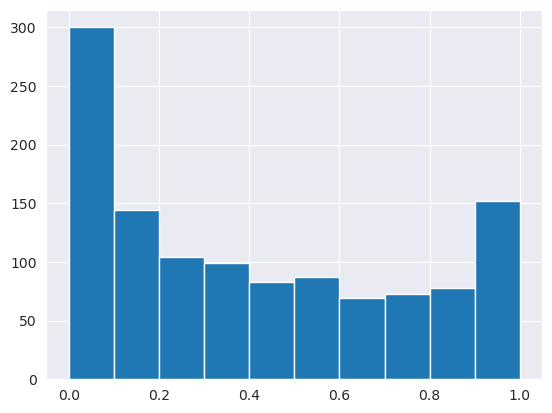

In [114]:
loading["Lun-02"].hist()

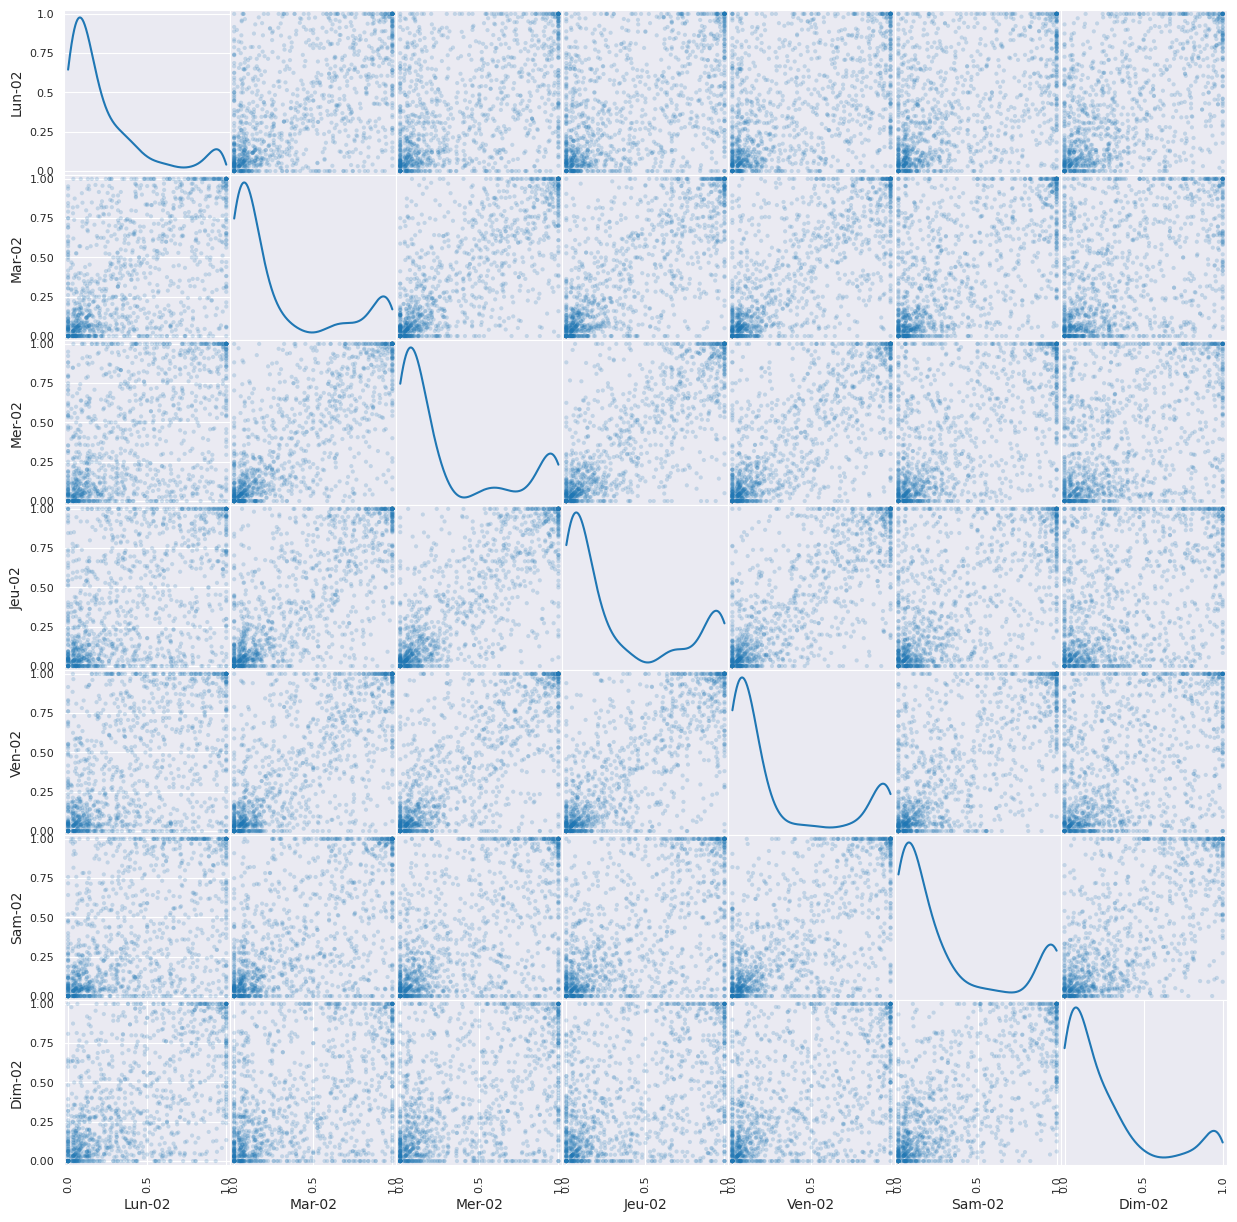

In [113]:
from pandas.plotting import scatter_matrix
heure="02"
scatter_matrix(loading[["Lun-"+heure,
                        "Mar-"+heure,
                        "Mer-"+heure,
                        "Jeu-"+heure,
                        "Ven-"+heure,
                        "Sam-"+heure,
                        "Dim-"+heure]], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

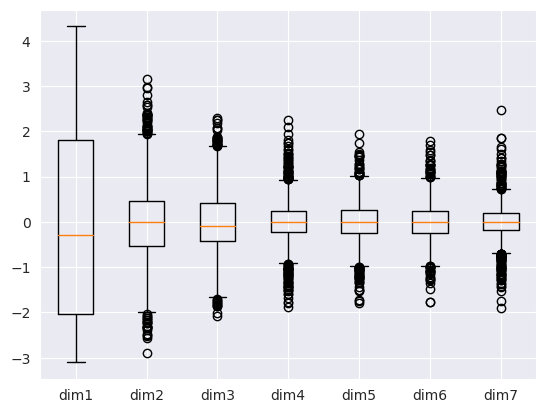

In [129]:
dim="dim"
tags = ["dim1","dim2","dim3","dim4","dim5","dim6","dim7"]
plt.boxplot(C[:,0:7], labels=tags)
plt.show()

On observe bien la première dimension explique a peu près 70% de la variance empirique, et que l'on peut s'arrêter à la dimension 3.

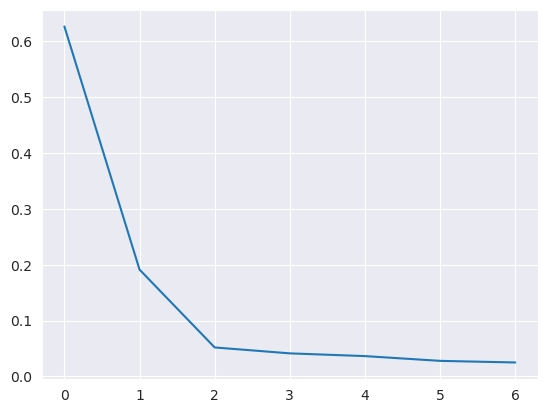

On garde les 3 premières composantes de l'ACP, afin d'expliquer 85.0 % de la variance empirique.


In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
#X=scale(ozone[["O3obs","MOCAGE","TEMPE","VentMOD","VentANG","SRMH2O","LNO2","LNO"]])
heure="12"
X=scale(loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()


ratio_voulu = 0.85
index = 0
cumul = 0

while cumul<ratio_voulu:
    cumul += pca.explained_variance_ratio_[index]
    index += 1
    
print("On garde les" ,index, "premières composantes de l'ACP, afin d'expliquer", ratio_voulu*100 ,"% de la variance empirique.")

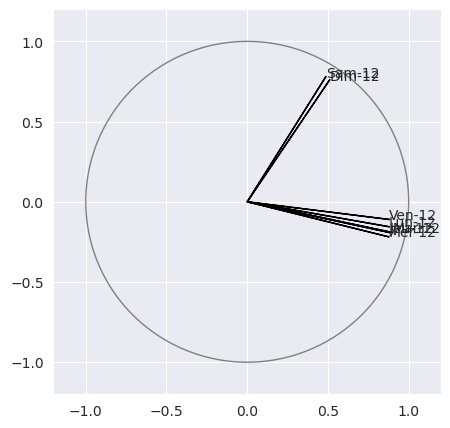

In [136]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim2)

En choisissant 12h, on voit que l'axe 1 est beaucoup plus corrélé aux variables de la semaine, tandis que l'axe 2 est plus corrélé aux variables du week-end. 

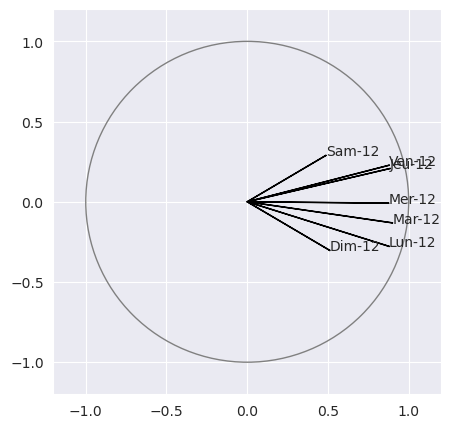

In [137]:
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim3)

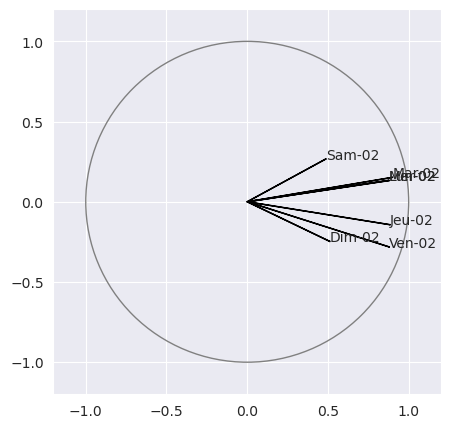

In [138]:
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="02"
for i, j, nom in zip(coord1,coord4, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim4)

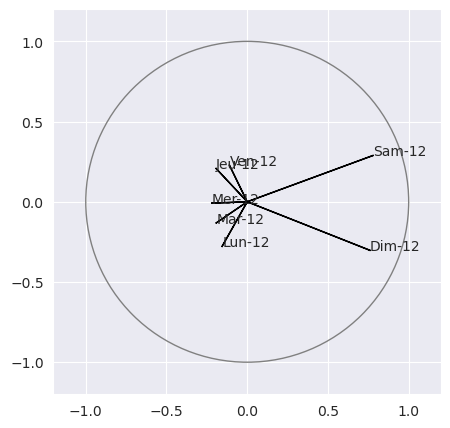

In [139]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="12"
for i, j, nom in zip(coord2,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim2,dim3)

On remarque que les jours de la semaine sont mal projetés dans ce plan, donc mal expliqués par ce couple de dimensions. Les jours du week-end sont, eux, corrélés négativement par rapport à la troisième composante.

In [99]:
print(pca.components_)

[[ 0.41874533  0.428665    0.41756112  0.4215991   0.41919666  0.23197272
   0.24343048]
 [-0.13416785 -0.16520771 -0.18847982 -0.16628765 -0.09509603  0.67243689
   0.65598365]
 [-0.46026381 -0.21776189 -0.01408084  0.34352822  0.37752412  0.47815773
  -0.50136593]
 [ 0.24528327  0.28254945  0.24834404 -0.26537474 -0.52252332  0.49516079
  -0.45791766]
 [-0.49109425 -0.09488805  0.68939628  0.23980889 -0.39109561 -0.13375541
   0.2149439 ]
 [-0.00862472 -0.22831068  0.48343265 -0.69678868  0.47738469 -0.00168282
  -0.02606303]
 [-0.54166108  0.77496373 -0.13881887 -0.25128562  0.13720027 -0.0480096
   0.04990499]]


On voit bien que samedi et dimanche sont très corrélés 